# Week 8: Time Series Modeling

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import datetime
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv file
sales = pd.read_csv('data/us_retail_sales.csv')

In [4]:
sales.shape

(30, 13)

In [5]:
sales.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


## Prep

In [3]:
# Melt month columns into rows
sales_melt = pd.melt(sales, id_vars =['YEAR']) 

In [4]:
# Create date from year and month
sales_melt['date'] = pd.to_datetime(sales_melt['YEAR'].astype(str) + sales_melt['variable'], format='%Y%b')
# Drop year and month
sales_melt = sales_melt.drop(['YEAR', 'variable'], axis=1)

In [5]:
# Sort date
sales_melt = sales_melt.sort_values('date')

In [6]:
# Set index to date
sales_melt = sales_melt.set_index('date')

In [7]:
# Rename value to sales
sales_melt.rename(columns={'value': 'sales'}, inplace=True)

In [8]:
# Find null values
sales_melt.isna().sum()

sales    6
dtype: int64

In [9]:
# Drop null records
sales_melt.dropna(inplace= True, how='any')

In [154]:
# Describe sales
sales_melt.describe()

,sales
count,354.000000
mean,307006.573446
std,94335.828235
min,146805.000000
25%,231402.000000
50%,309534.500000
75%,378193.750000
max,562269.000000


## Plot

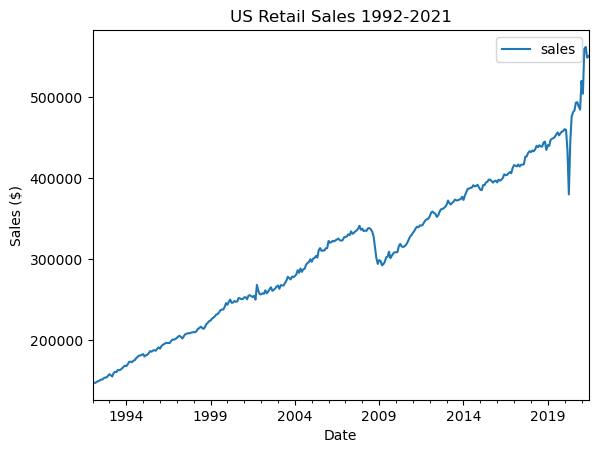

In [156]:
# Plot true retail sales
sales_melt.plot()
plt.title("US Retail Sales 1992-2021")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.show()

Based on the line plot above, it appears that sales steadily increase until 2020. There appears to be a huge dip and later a much larger spike that historically found.

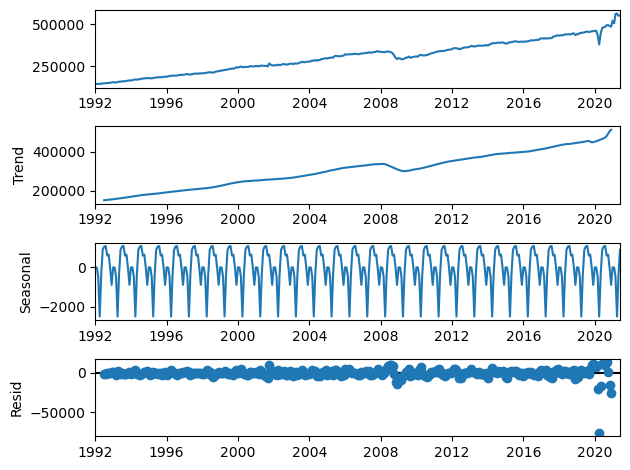

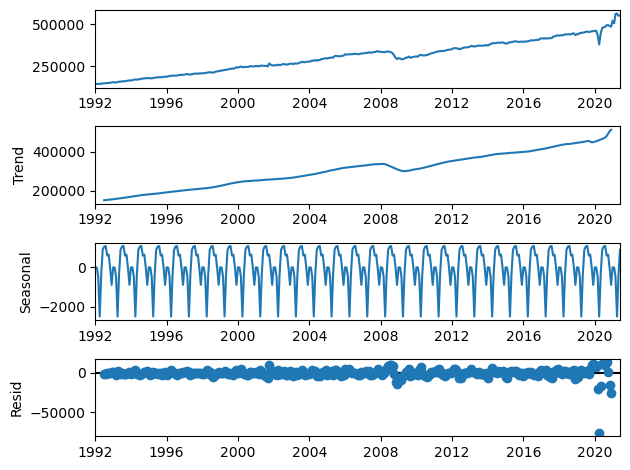

In [198]:
# Find seasonality
decompose_data = seasonal_decompose(sales_melt, model="additive")
decompose_data.plot()

## Split

In [11]:
# Split train/test
train = sales_melt.loc[:'2020-6']
test = sales_melt.loc['2020-07':]

## Build

In [12]:
# Use Holt Winter's Method for time series
fitted_model = ExponentialSmoothing(train['sales'],trend='add',seasonal='add',seasonal_periods=12).fit()

## Predict

In [13]:
# Forecast 12 months
forecast = fitted_model.forecast(12)

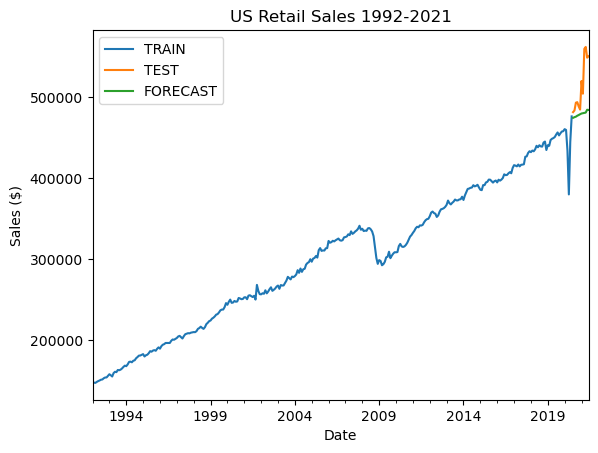

In [14]:
# Plot true sales vs forecast
train['sales'].plot(legend=True,label='TRAIN')
test['sales'].plot(legend=True,label='TEST')
forecast.plot(legend=True,label='FORECAST')
plt.title("US Retail Sales 1992-2021")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.show()

## RMSE

In [15]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt 

In [16]:
#calculate RMSE
sqrt(mean_squared_error(test['sales'], forecast))

45156.97171858642

## Summary

Utilizing the Holt Winter's method, a forecast was made from July 2020 to June 2021. The actual values are greater compared to the forecast values by the RMSE of 45157. This could happen because the past training data was consistent up until the forecasted point where there appears to be a spike.